In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls '/content/gdrive/Shareddrives/STATS 170A Final Project/datasets/PSID_1969-2011/'

READ_ME_PSID.txt	     wzbpsid_2015V2.dta
wzbpsid_2015V2_codebook.pdf  wzbpsid_2015V2_retrival.do


In [ ]:
path = '/content/gdrive/Shareddrives/STATS 170A Final Project/'

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
df_psid_raw = pd.read_stata('/content/gdrive/Shareddrives/STATS 170A Final Project/datasets/PSID_1969-2011/wzbpsid_2015V2.dta')

In [ ]:
df_psid_raw.head()

,x11101ll,x11102,xsqnr,wave,waveorder,fu03,fu05,fu06,fu01,fu02V1,fu02V2,fu02V3,fu04,rel2h,ch03,ch07,ch01,ch02,ch04,sib01,sib02,sib03V1,sib03V2,sib03V3,mar11,mar09,sup01,sup02,sup03,ybirth,age,sex,marital,race01,race02,brthcntry,fthus01,fthus02,mthus,sbdyus,...,adl11V2,adl13V1,adl13V2,adl01,adl02,adl04,adl07,adl08,adl12,alc01,alc02,alc03,smk01,smk02,smk03,hgt01,hgt02,hgt03,bodyweight,hospital,crm01,crm02,crm03,crm04,crm05,crm06,crm07,crm08,int01,int02,mor,wght01_im,wght02_im,wght01,wght02,psu,act01,act02,int01s,cpi
0,5327002.0,1.0,2.0,1969,2.0,0.0,4.0,NaN,NaN,1.0,NaN,NaN,NaN,2.0,NaN,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.0,NaN,NaN,NaN,Female 2,NaN,White 1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1969-03-11,NaN,NaN,NaN,NaN,NaN,NaN,24.0,NaN,NaN,11mar1969,6.13
1,5327004.0,1.0,4.0,1969,2.0,0.0,4.0,NaN,NaN,1.0,NaN,NaN,NaN,3.0,NaN,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.0,NaN,NaN,NaN,Female 2,NaN,White 1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1969-03-11,NaN,NaN,NaN,NaN,NaN,NaN,24.0,NaN,NaN,11mar1969,6.13
2,5327003.0,1.0,3.0,1969,2.0,0.0,4.0,NaN,NaN,1.0,NaN,NaN,NaN,3.0,NaN,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.0,NaN,NaN,NaN,Female 2,NaN,White 1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1969-03-11,NaN,NaN,NaN,NaN,NaN,NaN,24.0,NaN,NaN,11mar1969,6.13
3,5327001.0,1.0,1.0,1969,2.0,0.0,4.0,NaN,NaN,1.0,NaN,NaN,0.0,1.0,NaN,2.0,NaN,NaN,2.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,5.0,0.0,NaN,NaN,NaN,Male 1,NaN,White 1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1969-03-11,NaN,NaN,NaN,NaN,NaN,NaN,24.0,NaN,NaN,11mar1969,6.13
4,5330002.0,2.0,2.0,1969,2.0,1.0,3.0,NaN,NaN,2.0,NaN,NaN,NaN,4.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.0,NaN,NaN,NaN,Female 2,NaN,White 1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1969-03-11,NaN,NaN,NaN,NaN,NaN,NaN,24.0,NaN,NaN,11mar1969,6.13


### wave
which year the interview is performed

In [ ]:
df_psid_raw['wave'].unique()

array([1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1999, 2001, 2003, 2005,
       2007, 2009, 2011, 2013, 2015, 1968], dtype=int16)

In [ ]:
df_psid_raw['wave'].isna().sum()/796302

0.0

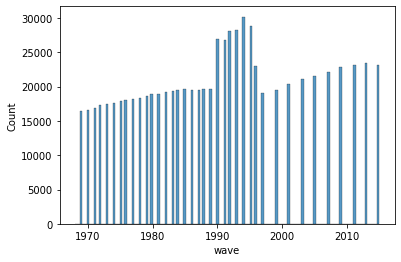

In [ ]:
sns.histplot(df_psid_raw['wave'])
plt.show()

In [ ]:
len(df_psid_raw[df_psid_raw['wave']<2008])

703688

In [ ]:
len(df_psid_raw[df_psid_raw['wave']>=2008])

92614

Start with comparing 2007 and 2009

In [ ]:
len(df_psid_raw[df_psid_raw['wave']==2007])

22102

In [ ]:
len(df_psid_raw[df_psid_raw['wave']==2009])

22928

In [ ]:
df_2007 = df_psid_raw[df_psid_raw['wave']==2007]
df_2009 = df_psid_raw[df_psid_raw['wave']==2009]

### race01
The race of the participant

In [ ]:
df_psid_raw['race01'].unique()

['White                     1', 'Black                     2', 'Am. Indian, Aleut, Eskimo 3', NaN, 'Other                     7', 'Hispanic                  5', 'Asian, Pac. Islander      4']
Categories (6, object): ['White                     1' < 'Black                     2' <
                         'Am. Indian, Aleut, Eskimo 3' < 'Asian, Pac. Islander      4' <
                         'Hispanic                  5' < 'Other                     7']

In [ ]:
df_psid_raw['race01'].isna().sum()/796302

0.09198896900924523

In [ ]:
df_psid_raw['sta01fips']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
796297    24.0
796298    24.0
796299    12.0
796300    12.0
796301     NaN
Name: sta01fips, Length: 796302, dtype: float64

In [ ]:
# Area and Demographic PSID dataframe
area_demo_psid = df_psid_raw[["sta01fips", "sta01gsa", "race01", "age",
                              "sex", "marital", "brthcntry"]]

In [ ]:
area_demo_psid.head()

,sta01fips,sta01gsa,race01,age,sex,marital,brthcntry
0,NaN,21.0,White 1,NaN,Female 2,NaN,NaN
1,NaN,21.0,White 1,NaN,Female 2,NaN,NaN
2,NaN,21.0,White 1,NaN,Female 2,NaN,NaN
3,NaN,21.0,White 1,NaN,Male 1,NaN,NaN
4,NaN,21.0,White 1,NaN,Female 2,NaN,NaN


In [ ]:
area_demo_psid.isna().sum()/len(area_demo_psid)

sta01fips    0.379649
sta01gsa     0.017976
race01       0.091989
age          0.077950
sex          0.000003
marital      0.076067
brthcntry    0.951496
dtype: float64

In [ ]:
# Income, Expenses, and Parent's Occupation PSID dataframe
income_and_expenses_psid = df_psid_raw[["emp21", "inc01", "inc02", "inc04", "inc05", "inc06",
                                   "inc08", "inc09", "inc10", "inc11", "exp01", "exp02",
                                   "par02", "par05V1", "par06V1", "leadearn"]]

In [ ]:
income_and_expenses_psid.isna().sum()/len(income_and_expenses_psid)

emp21       0.463746
inc01       0.089304
inc02       0.075441
inc04       0.075441
inc05       0.075675
inc06       0.374877
inc08       0.435045
inc09       0.791823
inc10       0.963332
inc11       0.000001
exp01       0.651587
exp02       0.000000
par02       0.000001
par05V1     0.908861
par06V1     0.969017
leadearn    0.000001
dtype: float64

In [ ]:
income_and_expenses_psid.dropna(thresh=9).round(2).head()

,emp21,inc01,inc02,inc04,inc05,inc06,inc08,inc09,inc10,inc11,exp01,exp02,par02,par05V1,par06V1,leadearn
16494,NaN,0.0,50135.2,45161.12,3480.0,0.0,17.570000,NaN,NaN,9244.0,350.0,0.0,1.0,NaN,NaN,0.0
16495,0.00,0.0,50135.2,45161.12,3480.0,0.0,17.570000,NaN,NaN,9244.0,350.0,0.0,1.0,NaN,NaN,0.0
16496,4.37,50135.2,50135.2,45161.12,3480.0,0.0,17.570000,NaN,NaN,9244.0,350.0,0.0,1.0,NaN,NaN,1.0
16497,NaN,0.0,98600.0,76551.88,0.0,0.0,32.310001,NaN,NaN,17000.0,350.0,7975.0,5.0,NaN,NaN,0.0
16498,3.50,40600.0,98600.0,76551.88,0.0,0.0,32.310001,NaN,NaN,17000.0,350.0,7975.0,5.0,NaN,NaN,0.0


In [ ]:
# Wealth and Homeownership PSID dataframe
wealth_and_homeownership_psid = df_psid_raw[["wlt01", "wlt02", "wlt03V1", "wlt04", "wlt05", "dbt01", "dbt02",
                                        "own03", "equ02", "prp01", "prp04", "prp06", "prp07", "mtg01",
                                        "mtg02", "mtg04"]]

In [ ]:
wealth_and_homeownership_psid.dropna(thresh=7).head()

,wlt01,wlt02,wlt03V1,wlt04,wlt05,dbt01,dbt02,own03,equ02,prp01,prp04,prp06,prp07,mtg01,mtg02,mtg04
270123,-100.0,-100.0,0.0,NaN,2288.0,100.0,1.0,5.0,0.0,5.0,0.0,NaN,1.0,0.0,0.0,NaN
270124,5800.0,33800.0,0.0,NaN,4025.0,4000.0,1.0,5.0,1300.0,1.0,95000.0,NaN,1.0,1.0,5.0,NaN
270125,5800.0,33800.0,0.0,NaN,4025.0,4000.0,1.0,5.0,1300.0,1.0,95000.0,NaN,1.0,1.0,5.0,NaN
270126,5800.0,33800.0,0.0,NaN,4025.0,4000.0,1.0,5.0,1300.0,1.0,95000.0,NaN,1.0,1.0,5.0,NaN
270127,5800.0,33800.0,0.0,NaN,4025.0,4000.0,1.0,5.0,1300.0,1.0,95000.0,NaN,1.0,1.0,5.0,NaN


In [ ]:
# Employment and Occupation PSID dataframe
employment_psid = df_psid_raw[["emp00", "emp02", "emp08", "emp13", "emp14", "emp19V1",
                               "emp21", "emp15", "occ3", "egp10i", "egp10"]]

In [ ]:
employment_psid.dropna(thresh=9).head()

,emp00,emp02,emp08,emp13,emp14,emp19V1,emp21,emp15,occ3,egp10i,egp10
212584,1.0,36.923077,NaN,1.0,156.0,0.0,14.58,NaN,99.0,Semi-Unsk. Man.,Semi-Unsk. Man.
212585,1.0,3.307692,NaN,1.0,3.0,0.0,4.07,NaN,95.0,Sk. Manual,Sk. Manual
212586,1.0,24.615385,NaN,1.0,5.0,1.0,4.69,NaN,59.0,Rout. Non. Man.,Semi-Unsk. Man.
212587,1.0,45.673077,NaN,1.0,120.0,0.0,5.05,NaN,56.0,Semi-Unsk. Man.,Semi-Unsk. Man.
212588,1.0,10.576923,NaN,1.0,168.0,1.0,6.82,NaN,54.0,Semi-Unsk. Man.,Semi-Unsk. Man.


In [ ]:
# Education PSID dataframe
education_psid = df_psid_raw[["edu00", "edu01", "edu02", "edu05typ", "edu08", "edu10",
                              "edu03", "edu04", "edu05", "edu06fthr", "edu06mthr"]]

In [ ]:
education_psid.dropna(thresh=7).head()

,edu00,edu01,edu02,edu05typ,edu08,edu10,edu03,edu04,edu05,edu06fthr,edu06mthr
289633,8.0,1.0,97.0,NaN,8.0,NaN,5.0,0.0,0.0,1.0,3.0
289634,12.0,1.0,97.0,NaN,12.0,NaN,5.0,0.0,0.0,3.0,3.0
289635,12.0,1.0,3.0,NaN,12.0,NaN,5.0,0.0,0.0,4.0,7.0
289636,12.0,1.0,3.0,NaN,12.0,NaN,5.0,0.0,0.0,7.0,6.0
289638,12.0,1.0,3.0,NaN,12.0,NaN,1.0,0.0,0.0,4.0,4.0


In [ ]:
# Welfare State PSID dataframe
welfare_state_psid = df_psid_raw[["rent","sinc11","sinc12","pen01","pen03",
                             "isr01","isr02","isr04","ntr02","ntr03"]]

In [ ]:
welfare_state_psid.head()

,rent,sinc11,sinc12,pen01,pen03,isr01,isr02,isr04,ntr02,ntr03
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0


In [ ]:
#welfare_state_psid[["sinc11"].notna()].tail()
welfare_state_psid.dropna(thresh=8)

,rent,sinc11,sinc12,pen01,pen03,isr01,isr02,isr04,ntr02,ntr03
660010,0.0,0.0,0.0,1.0,0.0,5.0,NaN,0.0,NaN,5.0
660011,0.0,0.0,0.0,1.0,1000.0,5.0,NaN,0.0,NaN,5.0
660012,18000.0,0.0,0.0,0.0,0.0,1.0,NaN,172.0,NaN,5.0
660013,3900.0,0.0,0.0,0.0,0.0,1.0,NaN,8148.0,NaN,5.0
660014,3900.0,0.0,0.0,0.0,0.0,1.0,NaN,8148.0,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...
703681,13500.0,0.0,0.0,0.0,0.0,9.0,NaN,0.0,NaN,5.0
703682,19800.0,0.0,0.0,0.0,0.0,9.0,NaN,0.0,NaN,5.0
703683,19800.0,0.0,0.0,0.0,0.0,9.0,NaN,0.0,NaN,5.0
703685,2940.0,0.0,0.0,0.0,0.0,9.0,NaN,0.0,NaN,5.0


# 4.12 Update:
Since there are three significant hurricane events during 2008, it would be a good idea to start by comparing the data of 2007 and that of 2009.

In [ ]:
df_2007 = df_psid_raw[df_psid_raw['wave']==2007]
df_2009 = df_psid_raw[df_psid_raw['wave']==2009]

## TODO: Aggregation by gsa code

### TODO: Aggregation on demographic variables
e.g. percentage of each demo group

In [ ]:
import pickle

In [ ]:
demo_list = df_psid_raw['race01'].astype('str').unique()
demo_list

array(['White                     1', 'Black                     2',
       'Am. Indian, Aleut, Eskimo 3', 'nan',
       'Other                     7', 'Hispanic                  5',
       'Asian, Pac. Islander      4'], dtype=object)

In [ ]:
df_2007.groupby(['sta01fips','race01']).agg({'race01':'count'}).head(20)

race01
sta01fips race01                             
0.0       White                     1      56
          Black                     2       6
          Am. Indian, Aleut, Eskimo 3       0
          Asian, Pac. Islander      4       4
          Hispanic                  5       0
          Other                     7      12
1.0       White                     1      67
          Black                     2     178
          Am. Indian, Aleut, Eskimo 3       0
          Asian, Pac. Islander      4       0
          Hispanic                  5       0
          Other                     7       1
2.0       White                     1      28
          Black                     2       0
          Am. Indian, Aleut, Eskimo 3       1
          Asian, Pac. Islander      4       0
          Hispanic                  5       0
          Other                     7       0
4.0       White                     1     201
          Black                     2      11

In [ ]:
df_features = df_2007.groupby(['sta01fips','race01']).agg({'race01':'count'}).unstack(level=-1)
df_features

race01  ...                            
race01    White                     1  ... Other                     7
sta01fips                              ...                            
0.0                                56  ...                          12
1.0                                67  ...                           1
2.0                                28  ...                           0
4.0                               201  ...                          54
5.0                               317  ...                           0
6.0                               757  ...                         507
8.0                               283  ...                          20
9.0                                81  ...                           9
10.0                               11  ...                           1
11.0                                4  ...                           0
12.0                              458  ...                          69
13.0                              189  ...                          12
15.0                                9  ...                           0
16.0                               20  ...                           3
17.0                              302  ...                          42
18.0                              386  ...                          11
19.0                              370  ...                           4
20.0                               75  ...                          11
21.0                              218  ...                           4
22.0                               38  ...                          21
23.0                               66  ...                           0
24.0                              125  ...                          26
25.0                              321  ...                          11
26.0                              510  ...                          15
27.0                              263  ...                           2
28.0                              121  ...                           1
29.0                              368  ...                          11
30.0                               20  ...                           2
31.0                              145  ...                           1
32.0                              105  ...                           8
33.0                               31  ...                           3
34.0                              345  ...                          24
35.0                               22  ...                           0
36.0                              485  ...                          66
37.0                              297  ...                           5
38.0                               21  ...                           0
39.0                              549  ...                          20
40.0                              104  ...                           4
41.0                              288  ...                          10
42.0                              503  ...                          29
44.0                               10  ...                           3
45.0                              202  ...                          14
46.0                               49  ...                           8
47.0                              255  ...                           0
48.0                              511  ...                          85
49.0                              172  ...                          12
50.0                                9  ...                           1
51.0                              356  ...                           9
53.0                              294  ...                          10
54.0                               26  ...                           0
55.0                              194  ...                          50
56.0                               16  ...                           0

[52 rows x 6 columns]

In [ ]:
dlist = ['White','Black','Am. Indian','Asian','Hispanic','Other']
df_features.columns = dlist
df_features = df_features.reset_index()
df_features.head(10)

,sta01fips,White,Black,Am. Indian,Asian,Hispanic,Other
0,0.0,56,6,0,4,0,12
1,1.0,67,178,0,0,0,1
2,2.0,28,0,1,0,0,0
3,4.0,201,11,8,1,4,54
4,5.0,317,102,17,1,0,0
5,6.0,757,376,25,70,16,507
6,8.0,283,9,3,9,0,20
7,9.0,81,11,0,2,0,9
8,10.0,11,17,0,0,0,1
9,11.0,4,98,0,0,0,0


In [ ]:
df_features['demo_sum'] = df_features[dlist].apply('sum',axis=1)
for i in dlist:
  df_features[i+'%'] = df_features[i]/df_features['demo_sum']
df_features.head(10)

,sta01fips,White,Black,Am. Indian,Asian,Hispanic,Other,demo_sum,White%,Black%,Am. Indian%,Asian%,Hispanic%,Other%
0,0.0,56,6,0,4,0,12,78,0.717949,0.076923,0.000000,0.051282,0.000000,0.153846
1,1.0,67,178,0,0,0,1,246,0.272358,0.723577,0.000000,0.000000,0.000000,0.004065
2,2.0,28,0,1,0,0,0,29,0.965517,0.000000,0.034483,0.000000,0.000000,0.000000
3,4.0,201,11,8,1,4,54,279,0.720430,0.039427,0.028674,0.003584,0.014337,0.193548
4,5.0,317,102,17,1,0,0,437,0.725400,0.233410,0.038902,0.002288,0.000000,0.000000
5,6.0,757,376,25,70,16,507,1751,0.432324,0.214734,0.014278,0.039977,0.009138,0.289549
6,8.0,283,9,3,9,0,20,324,0.873457,0.027778,0.009259,0.027778,0.000000,0.061728
7,9.0,81,11,0,2,0,9,103,0.786408,0.106796,0.000000,0.019417,0.000000,0.087379
8,10.0,11,17,0,0,0,1,29,0.379310,0.586207,0.000000,0.000000,0.000000,0.034483
9,11.0,4,98,0,0,0,0,102,0.039216,0.960784,0.000000,0.000000,0.000000,0.000000


In [ ]:
with open(path+'datasets/Data_Frames/df_features.pkl','wb') as outfile:
  pickle.dump(df_features, outfile)

In [ ]:
df_temp = pd.DataFrame()
with open(path+'datasets/Data_Frames/df_features.pkl','rb') as infile:
  df_temp = pickle.load(infile)
df_temp.head()

,sta01fips,White,Black,Am. Indian,Asian,Hispanic,Other,demo_sum,White%,Black%,Am. Indian%,Asian%,Hispanic%,Other%
0,0.0,56,6,0,4,0,12,78,0.717949,0.076923,0.000000,0.051282,0.000000,0.153846
1,1.0,67,178,0,0,0,1,246,0.272358,0.723577,0.000000,0.000000,0.000000,0.004065
2,2.0,28,0,1,0,0,0,29,0.965517,0.000000,0.034483,0.000000,0.000000,0.000000
3,4.0,201,11,8,1,4,54,279,0.720430,0.039427,0.028674,0.003584,0.014337,0.193548
4,5.0,317,102,17,1,0,0,437,0.725400,0.233410,0.038902,0.002288,0.000000,0.000000


### TODO: Aggregation on Income and Wealth variables
e.g. inc01 Individual labor earnings

In [ ]:
df_psid_raw[["emp21", "inc01", "inc02", "inc04", "inc05", "inc06",
                                   "inc08", "inc09", "inc10", "inc11", "exp01", "exp02",
                                   "par02", "par05V1", "par06V1", "leadearn"]].isna().sum()/796302

emp21       0.463746
inc01       0.089304
inc02       0.075441
inc04       0.075441
inc05       0.075675
inc06       0.374877
inc08       0.435045
inc09       0.791823
inc10       0.963332
inc11       0.000001
exp01       0.651587
exp02       0.000000
par02       0.000001
par05V1     0.908861
par06V1     0.969017
leadearn    0.000001
dtype: float64

na checking for state code

In [ ]:
df_2007['sta01fips'].isna().sum()/len(df_2007)

0.0

In [ ]:
df_2007['sta01gsa'].isna().sum()/len(df_2007)

0.0

In [ ]:
df_2009['sta01fips'].isna().sum()/len(df_2009)

0.0

In [ ]:
df_2009['sta01gsa'].isna().sum()/len(df_2009)

0.0

In [ ]:
df_response = df_2007.groupby('sta01fips').agg({'inc01':'mean'}).reset_index()
df_response.rename(columns={'inc01':'mean_inc01_2007'}, inplace=True)
df_response['mean_inc01_2009'] = df_2009.groupby('sta01fips').agg({'inc01':'mean'}).reset_index()['inc01']
df_response.head(10)

,sta01fips,mean_inc01_2007,mean_inc01_2009
0,0.0,27063.448108,24905.738869
1,1.0,16552.915581,19696.374882
2,2.0,36060.155183,38347.017376
3,4.0,25486.059158,24613.345036
4,5.0,20406.178589,20987.013518
5,6.0,23466.425890,24332.371454
6,8.0,28614.997232,37516.135667
7,9.0,42394.482737,38092.614625
8,10.0,16714.421735,19036.499135
9,11.0,13778.471136,15363.053480


In [ ]:
df_response['inc01_diff'] = df_response['mean_inc01_2009'] - df_response['mean_inc01_2007']
df_response.head()

,sta01fips,mean_inc01_2007,mean_inc01_2009,inc01_diff
0,0.0,27063.448108,24905.738869,-2157.709239
1,1.0,16552.915581,19696.374882,3143.459301
2,2.0,36060.155183,38347.017376,2286.862193
3,4.0,25486.059158,24613.345036,-872.714122
4,5.0,20406.178589,20987.013518,580.834929


In [ ]:
with open(path+'datasets/Data_Frames/df_response.pkl','wb') as outfile:
  pickle.dump(df_response, outfile)

In [ ]:
df_temp = pd.DataFrame()
with open(path+'datasets/Data_Frames/df_response.pkl','rb') as infile:
  df_temp = pickle.load(infile)
df_temp.head()

,sta01fips,mean_inc01_2007,mean_inc01_2009,inc01_diff
0,0.0,27063.448108,24905.738869,-2157.709239
1,1.0,16552.915581,19696.374882,3143.459301
2,2.0,36060.155183,38347.017376,2286.862193
3,4.0,25486.059158,24613.345036,-872.714122
4,5.0,20406.178589,20987.013518,580.834929
